In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

from scipy.stats import linregress
from sklearn.metrics import mean_squared_error as mse

# set plot parameters
params = {'legend.fontsize': 18,
          'figure.figsize': (16, 12),
          'lines.linewidth': 3,
          'axes.labelsize': 24,
          'axes.titlesize':24,
          'axes.linewidth':3,
          'boxplot.boxprops.linewidth':3.0,
          'boxplot.capprops.linewidth': 3.0,
          'boxplot.flierprops.linewidth': 3.0,
          'boxplot.medianprops.color': 'C0',
          'boxplot.medianprops.linestyle': '-',
          'boxplot.medianprops.linewidth': 3.0,
          'xtick.labelsize':20,
          'ytick.labelsize':20}
plt.rcParams.update(params)
plt.style.use('seaborn-colorblind')
plt.rcParams['pdf.fonttype'] = 42

In [2]:
# specify species and metabolite names 
df = pd.read_csv("../Data/2021_02_19_MultifunctionalDynamicData.csv")
sys_vars = df.columns.values[2:]
species = df.columns.values[2:-4]
metabolites =  df.columns.values[-4:]
controls = []
system_variables = np.concatenate((np.array(species), np.array(metabolites)))
system_variables

array(['PC_OD', 'PJ_OD', 'BV_OD', 'BF_OD', 'BO_OD', 'BT_OD', 'BC_OD',
       'BY_OD', 'BU_OD', 'DP_OD', 'BL_OD', 'BA_OD', 'BP_OD', 'CA_OD',
       'EL_OD', 'FP_OD', 'CH_OD', 'AC_OD', 'BH_OD', 'CG_OD', 'ER_OD',
       'RI_OD', 'CC_OD', 'DL_OD', 'DF_OD', 'Butyrate', 'Acetate',
       'Lactate', 'Succinate'], dtype=object)

In [3]:
# save dictionary with performance of each model 
performance_dict = {}

models = ["RNN", "MiRNN"]
# sample_sizes = np.arange(1, 70+1) 
sample_sizes = np.append(1, np.arange(5, 70+1)[::5]) 
n_trials  = 10

for n_sample in sample_sizes:
    for model in models:
        s_Rs = []
        m_Rs = []

        s_rmses = []
        m_rmses = []
        
        for trial in range(1, n_trials+1):
            # import prediction dataframe
            df_kfold = pd.read_csv(f"Bootstrap/{model}_{n_sample}samples_trial_{trial}.csv")
            
            # prediction performances of species 
            s_rmse = 0
            for variable in species:
                y = []
                y_pred = []
                for exp_name, exp_df in df_kfold.groupby("Experiments"):
                    if model != "LSTM":
                        true_vals = exp_df[variable + " true"].values
                    else:
                        true_vals = exp_df[variable].values
                    pred_vals = exp_df[variable + " pred"].values
                    # append values
                    if true_vals[0] > 0:
                        y.append(true_vals[1:])
                        y_pred.append(pred_vals[1:])
                s_rmse += np.sqrt(mse(np.concatenate(y), np.concatenate(y_pred))) / len(species)
            s_rmses.append(s_rmse)
            
            # prediction performances of species 
            s_R = 0
            for variable in species:
                y = []
                y_pred = []
                for exp_name, exp_df in df_kfold.groupby("Experiments"):
                    if model != "LSTM":
                        true_vals = exp_df[variable + " true"].values
                    else:
                        true_vals = exp_df[variable].values
                    pred_vals = exp_df[variable + " pred"].values
                    # append values
                    if true_vals[0] > 0:
                        y.append(true_vals[1:])
                        y_pred.append(pred_vals[1:])
                s_R += linregress(np.concatenate(y), np.concatenate(y_pred)).rvalue / len(species)
            s_Rs.append(s_R)
                
            # ignore time zero values
            t_0 = df_kfold.Time.values == 0
                
            # prediction performances of metabolites
            m_rmse = 0
            for m in metabolites:
                m_rmse += np.sqrt(mse(df_kfold.iloc[~t_0][m+" true"], df_kfold.iloc[~t_0][m+" pred"])) / len(metabolites)
            m_rmses.append(m_rmse)
                
            # prediction performances of metabolites
            m_R = 0
            for m in metabolites:
                m_R += linregress(df_kfold.iloc[~t_0][m+" true"], df_kfold.iloc[~t_0][m+" pred"]).rvalue / len(metabolites)
            m_Rs.append(m_R)
        
        # store list of performances over each trial 
        performance_dict[model + " " + str(n_sample) + " species rmse" ] = s_rmses
        performance_dict[model + " " + str(n_sample) + " metabolites rmse"] = m_rmses    
        
        # store list of performances over each trial 
        performance_dict[model + " " + str(n_sample) + " species R" ] = s_Rs
        performance_dict[model + " " + str(n_sample) + " metabolites R"] = m_Rs        

models = ["MCR"]
sample_sizes = np.append(1, np.arange(5, 70+1)[::5]) 
n_trials  = 10

for n_sample in sample_sizes:
    for model in models:
        s_Rs = []
        m_Rs = []

        s_rmses = []
        m_rmses = []
        
        for trial in range(1, n_trials+1):
            # import prediction dataframe
            df_kfold = pd.read_csv(f"Bootstrap/{model}_{n_sample}samples_trial_{trial}.csv")
            
            # prediction performances of species 
            s_rmse = 0
            for variable in species:
                y = []
                y_pred = []
                for exp_name, exp_df in df_kfold.groupby("Experiments"):
                    if model != "LSTM":
                        true_vals = exp_df[variable + " true"].values
                    else:
                        true_vals = exp_df[variable].values
                    pred_vals = exp_df[variable + " pred"].values
                    # append values
                    if true_vals[0] > 0:
                        y.append(true_vals[1:])
                        y_pred.append(pred_vals[1:])
                s_rmse += np.sqrt(mse(np.concatenate(y), np.concatenate(y_pred))) / len(species)
            s_rmses.append(s_rmse)
            
            # prediction performances of species 
            s_R = 0
            for variable in species:
                y = []
                y_pred = []
                for exp_name, exp_df in df_kfold.groupby("Experiments"):
                    if model != "LSTM":
                        true_vals = exp_df[variable + " true"].values
                    else:
                        true_vals = exp_df[variable].values
                    pred_vals = exp_df[variable + " pred"].values
                    # append values
                    if true_vals[0] > 0:
                        y.append(true_vals[1:])
                        y_pred.append(pred_vals[1:])
                s_R += linregress(np.concatenate(y), np.concatenate(y_pred)).rvalue / len(species)
            s_Rs.append(s_R)
                
            # ignore time zero values
            t_0 = df_kfold.Time.values == 0
                
            # prediction performances of metabolites
            m_rmse = 0
            for m in metabolites:
                m_rmse += np.sqrt(mse(df_kfold.iloc[~t_0][m+" true"], df_kfold.iloc[~t_0][m+" pred"])) / len(metabolites)
            m_rmses.append(m_rmse)
                
            # prediction performances of metabolites
            m_R = 0
            for m in metabolites:
                m_R += linregress(df_kfold.iloc[~t_0][m+" true"], df_kfold.iloc[~t_0][m+" pred"]).rvalue / len(metabolites)
            m_Rs.append(m_R)
        
        # store list of performances over each trial 
        performance_dict[model + " " + str(n_sample) + " species rmse" ] = s_rmses
        performance_dict[model + " " + str(n_sample) + " metabolites rmse"] = m_rmses    
        
        # store list of performances over each trial 
        performance_dict[model + " " + str(n_sample) + " species R" ] = s_Rs
        performance_dict[model + " " + str(n_sample) + " metabolites R"] = m_Rs    
        
models = ["LSTM"]
sample_sizes = np.append(1, np.arange(5, 70+1)[::5]) 
n_trials  = 10

for n_sample in sample_sizes:
    for model in models:
        s_Rs = []
        m_Rs = []

        s_rmses = []
        m_rmses = []
        
        for trial in range(1, n_trials+1):
            # import prediction dataframe
            df_kfold = pd.read_csv(f"Bootstrap/{model}_{n_sample}samples_trial_{trial}.csv")
            
            # prediction performances of species 
            s_rmse = 0
            for variable in species:
                y = []
                y_pred = []
                for exp_name, exp_df in df_kfold.groupby("Experiments"):
                    if model != "LSTM":
                        true_vals = exp_df[variable + " true"].values
                    else:
                        true_vals = exp_df[variable].values
                    pred_vals = exp_df[variable + " pred"].values
                    # append values
                    if true_vals[0] > 0:
                        y.append(true_vals[1:])
                        y_pred.append(pred_vals[1:])
                s_rmse += np.sqrt(mse(np.concatenate(y), np.concatenate(y_pred))) / len(species)
            s_rmses.append(s_rmse)
            
            # prediction performances of species 
            s_R = 0
            for variable in species:
                y = []
                y_pred = []
                for exp_name, exp_df in df_kfold.groupby("Experiments"):
                    if model != "LSTM":
                        true_vals = exp_df[variable + " true"].values
                    else:
                        true_vals = exp_df[variable].values
                    pred_vals = exp_df[variable + " pred"].values
                    # append values
                    if true_vals[0] > 0:
                        y.append(true_vals[1:])
                        y_pred.append(pred_vals[1:])
                s_R += linregress(np.concatenate(y), np.concatenate(y_pred)).rvalue / len(species)
            s_Rs.append(s_R)
                
            # ignore time zero values
            t_0 = df_kfold.Time.values == 0
                
            # prediction performances of metabolites
            m_rmse = 0
            for m in metabolites:
                m_rmse += np.sqrt(mse(df_kfold.iloc[~t_0][m], df_kfold.iloc[~t_0][m+" pred"])) / len(metabolites)
            m_rmses.append(m_rmse)
                
            # prediction performances of metabolites
            m_R = 0
            for m in metabolites:
                m_R += linregress(df_kfold.iloc[~t_0][m], df_kfold.iloc[~t_0][m+" pred"]).rvalue / len(metabolites)
            m_Rs.append(m_R)
        
        # store list of performances over each trial 
        performance_dict[model + " " + str(n_sample) + " species rmse" ] = s_rmses
        performance_dict[model + " " + str(n_sample) + " metabolites rmse"] = m_rmses    
        
        # store list of performances over each trial 
        performance_dict[model + " " + str(n_sample) + " species R" ] = s_Rs
        performance_dict[model + " " + str(n_sample) + " metabolites R"] = m_Rs     

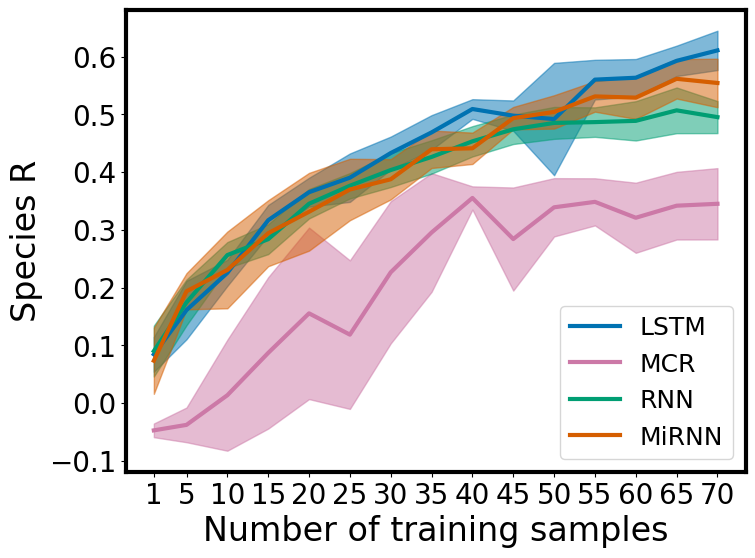

In [4]:
# compare R on species predictions 
plt.figure(figsize=(8, 6))
target = "species"
metric = "R"

# LSTM
model = "LSTM"
sample_sizes = np.append(1, np.arange(5, 70+1)[::5])
means = np.zeros(len(sample_sizes))
stdvs = np.zeros(len(sample_sizes))
for i, n_sample in enumerate(sample_sizes):
    means[i] = np.mean(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])
    stdvs[i] = np.std(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])

plt.plot(sample_sizes, means, c=f"C0", label=model)
plt.fill_between(sample_sizes, means-stdvs, means+stdvs, alpha=.5, color=f"C0")

# CR
model = "MCR"
sample_sizes = np.append(1, np.arange(5, 70+1)[::5])
means = np.zeros(len(sample_sizes))
stdvs = np.zeros(len(sample_sizes))
for i, n_sample in enumerate(sample_sizes):
    means[i] = np.mean(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])
    stdvs[i] = np.std(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])

plt.plot(sample_sizes, means, c=f"C3", label=model)
plt.fill_between(sample_sizes, means-stdvs, means+stdvs, alpha=.5, color=f"C3")


# RNN
model = "RNN"
# sample_sizes = np.arange(1, 70+1)
sample_sizes = np.append(1, np.arange(5, 70+1)[::5]) 
means = np.zeros(len(sample_sizes))
stdvs = np.zeros(len(sample_sizes))
for i, n_sample in enumerate(sample_sizes):
    means[i] = np.mean(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])
    stdvs[i] = np.std(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])

plt.plot(sample_sizes, means, c=f"C1", label=model)
plt.fill_between(sample_sizes, means-stdvs, means+stdvs, alpha=.5, color=f"C1")

# MiRNN
model = "MiRNN"
# sample_sizes = np.arange(1, 70+1)
sample_sizes = np.append(1, np.arange(5, 70+1)[::5]) 
means = np.zeros(len(sample_sizes))
stdvs = np.zeros(len(sample_sizes))
for i, n_sample in enumerate(sample_sizes):
    means[i] = np.mean(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])
    stdvs[i] = np.std(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])

plt.plot(sample_sizes, means, c=f"C2", label=model)
plt.fill_between(sample_sizes, means-stdvs, means+stdvs, alpha=.5, color=f"C2")

plt.xticks(np.append(1, np.arange(5, 70+1)[::5]))
plt.xlabel("Number of training samples")
plt.ylabel(f"Species R")
# plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.savefig("sensitivity_species_R.pdf")
plt.show()

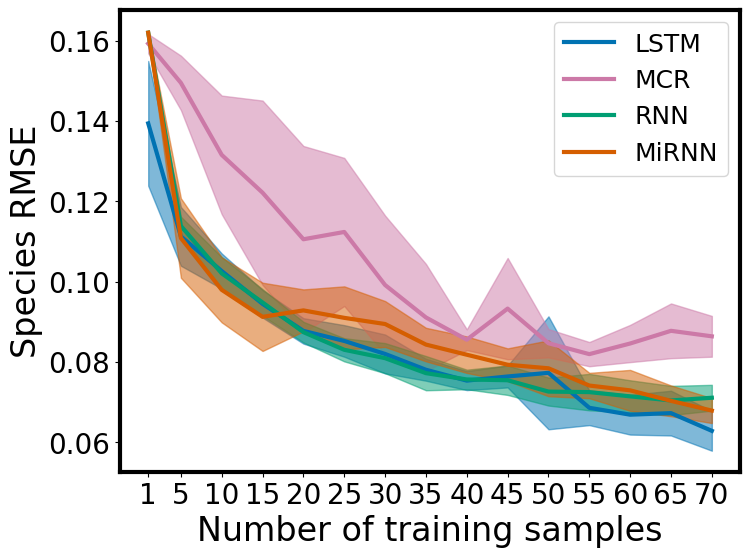

In [5]:
# compare R on species predictions 
plt.figure(figsize=(8, 6))
target = "species"
metric = "rmse"

# LSTM
model = "LSTM"
sample_sizes = np.append(1, np.arange(5, 70+1)[::5])
means = np.zeros(len(sample_sizes))
stdvs = np.zeros(len(sample_sizes))
for i, n_sample in enumerate(sample_sizes):
    means[i] = np.mean(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])
    stdvs[i] = np.std(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])

plt.plot(sample_sizes, means, c=f"C0", label=model)
plt.fill_between(sample_sizes, means-stdvs, means+stdvs, alpha=.5, color=f"C0")

# CR
model = "MCR"
sample_sizes = np.append(1, np.arange(5, 70+1)[::5])
means = np.zeros(len(sample_sizes))
stdvs = np.zeros(len(sample_sizes))
for i, n_sample in enumerate(sample_sizes):
    means[i] = np.mean(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])
    stdvs[i] = np.std(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])

plt.plot(sample_sizes, means, c=f"C3", label=model)
plt.fill_between(sample_sizes, means-stdvs, means+stdvs, alpha=.5, color=f"C3")


# RNN
model = "RNN"
# sample_sizes = np.arange(1, 70+1)
sample_sizes = np.append(1, np.arange(5, 70+1)[::5]) 
means = np.zeros(len(sample_sizes))
stdvs = np.zeros(len(sample_sizes))
for i, n_sample in enumerate(sample_sizes):
    means[i] = np.mean(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])
    stdvs[i] = np.std(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])

plt.plot(sample_sizes, means, c=f"C1", label=model)
plt.fill_between(sample_sizes, means-stdvs, means+stdvs, alpha=.5, color=f"C1")

# MiRNN
model = "MiRNN"
# sample_sizes = np.arange(1, 70+1)
sample_sizes = np.append(1, np.arange(5, 70+1)[::5]) 
means = np.zeros(len(sample_sizes))
stdvs = np.zeros(len(sample_sizes))
for i, n_sample in enumerate(sample_sizes):
    means[i] = np.mean(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])
    stdvs[i] = np.std(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])

plt.plot(sample_sizes, means, c=f"C2", label=model)
plt.fill_between(sample_sizes, means-stdvs, means+stdvs, alpha=.5, color=f"C2")

plt.xticks(np.append(1, np.arange(5, 70+1)[::5]))
plt.xlabel("Number of training samples")
plt.ylabel(f"Species RMSE")
plt.legend(loc='upper right')
plt.savefig("sensitivity_species_RMSE.pdf")
plt.show()

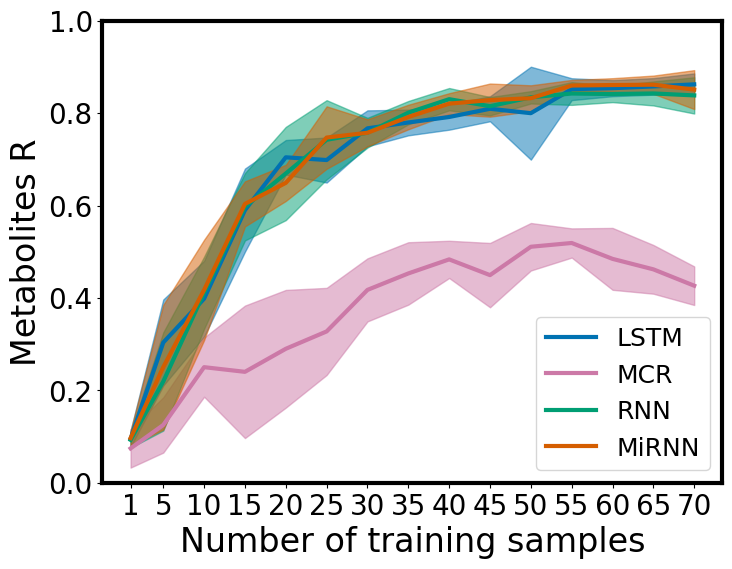

In [6]:
# compare R on species predictions 
plt.figure(figsize=(8, 6))
target = "metabolites"
metric = "R"

# LSTM
model = "LSTM"
sample_sizes = np.append(1, np.arange(5, 70+1)[::5])
means = np.zeros(len(sample_sizes))
stdvs = np.zeros(len(sample_sizes))
for i, n_sample in enumerate(sample_sizes):
    means[i] = np.mean(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])
    stdvs[i] = np.std(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])

plt.plot(sample_sizes, means, c=f"C0", label=model)
plt.fill_between(sample_sizes, means-stdvs, means+stdvs, alpha=.5, color=f"C0")

# CR
model = "MCR"
sample_sizes = np.append(1, np.arange(5, 70+1)[::5])
means = np.zeros(len(sample_sizes))
stdvs = np.zeros(len(sample_sizes))
for i, n_sample in enumerate(sample_sizes):
    means[i] = np.mean(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])
    stdvs[i] = np.std(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])

plt.plot(sample_sizes, means, c=f"C3", label=model)
plt.fill_between(sample_sizes, means-stdvs, means+stdvs, alpha=.5, color=f"C3")


# RNN
model = "RNN"
# sample_sizes = np.arange(1, 70+1)
sample_sizes = np.append(1, np.arange(5, 70+1)[::5]) 
means = np.zeros(len(sample_sizes))
stdvs = np.zeros(len(sample_sizes))
for i, n_sample in enumerate(sample_sizes):
    means[i] = np.mean(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])
    stdvs[i] = np.std(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])

plt.plot(sample_sizes, means, c=f"C1", label=model)
plt.fill_between(sample_sizes, means-stdvs, means+stdvs, alpha=.5, color=f"C1")

# MiRNN
model = "MiRNN"
# sample_sizes = np.arange(1, 70+1)
sample_sizes = np.append(1, np.arange(5, 70+1)[::5]) 
means = np.zeros(len(sample_sizes))
stdvs = np.zeros(len(sample_sizes))
for i, n_sample in enumerate(sample_sizes):
    means[i] = np.mean(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])
    stdvs[i] = np.std(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])

plt.plot(sample_sizes, means, c=f"C2", label=model)
plt.fill_between(sample_sizes, means-stdvs, means+stdvs, alpha=.5, color=f"C2")

plt.xticks(np.append(1, np.arange(5, 70+1)[::5]))
plt.xlabel("Number of training samples")
plt.ylabel(f"Metabolites R")
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.savefig("sensitivity_metabolites_R.pdf")
plt.show()

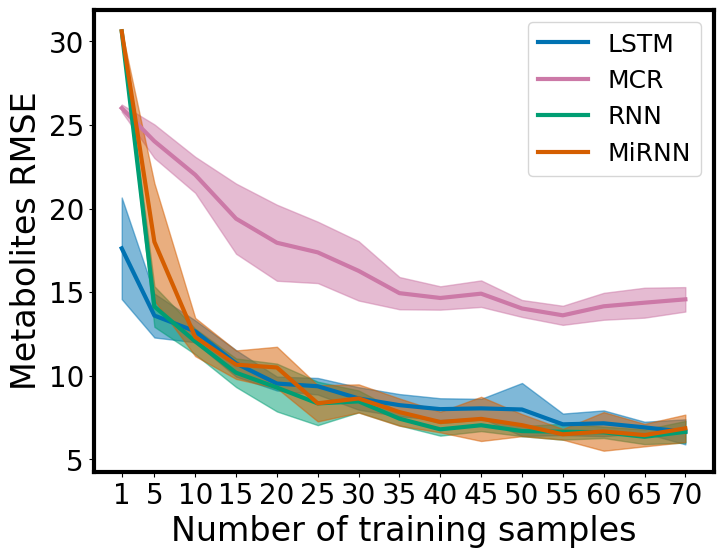

In [7]:
# compare R on species predictions 
plt.figure(figsize=(8, 6))
target = "metabolites"
metric = "rmse"

# LSTM
model = "LSTM"
sample_sizes = np.append(1, np.arange(5, 70+1)[::5])
means = np.zeros(len(sample_sizes))
stdvs = np.zeros(len(sample_sizes))
for i, n_sample in enumerate(sample_sizes):
    means[i] = np.mean(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])
    stdvs[i] = np.std(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])

plt.plot(sample_sizes, means, c=f"C0", label=model)
plt.fill_between(sample_sizes, means-stdvs, means+stdvs, alpha=.5, color=f"C0")

# CR
model = "MCR"
sample_sizes = np.append(1, np.arange(5, 70+1)[::5])
means = np.zeros(len(sample_sizes))
stdvs = np.zeros(len(sample_sizes))
for i, n_sample in enumerate(sample_sizes):
    means[i] = np.mean(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])
    stdvs[i] = np.std(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])

plt.plot(sample_sizes, means, c=f"C3", label=model)
plt.fill_between(sample_sizes, means-stdvs, means+stdvs, alpha=.5, color=f"C3")


# RNN
model = "RNN"
# sample_sizes = np.arange(1, 70+1)
sample_sizes = np.append(1, np.arange(5, 70+1)[::5]) 
means = np.zeros(len(sample_sizes))
stdvs = np.zeros(len(sample_sizes))
for i, n_sample in enumerate(sample_sizes):
    means[i] = np.mean(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])
    stdvs[i] = np.std(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])

plt.plot(sample_sizes, means, c=f"C1", label=model)
plt.fill_between(sample_sizes, means-stdvs, means+stdvs, alpha=.5, color=f"C1")

# MiRNN
model = "MiRNN"
# sample_sizes = np.arange(1, 70+1)
sample_sizes = np.append(1, np.arange(5, 70+1)[::5]) 
means = np.zeros(len(sample_sizes))
stdvs = np.zeros(len(sample_sizes))
for i, n_sample in enumerate(sample_sizes):
    means[i] = np.mean(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])
    stdvs[i] = np.std(performance_dict[model + " " + str(n_sample) + " " + target + " " + metric])

plt.plot(sample_sizes, means, c=f"C2", label=model)
plt.fill_between(sample_sizes, means-stdvs, means+stdvs, alpha=.5, color=f"C2")

plt.xticks(np.append(1, np.arange(5, 70+1)[::5]))
plt.xlabel("Number of training samples")
plt.ylabel(f"Metabolites RMSE")
plt.legend(loc='upper right')
plt.savefig("sensitivity_metabolites_RMSE.pdf")
plt.show()